In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Reading the DataSet
bank = pd.read_csv('/content/drive/My Drive/bank.csv')

In [0]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#Droping the columns which are unique for all users
bank=bank.drop(['Surname','RowNumber','CustomerId'],axis=1)

In [0]:
#Doing the one hot encoding on categorical columns
bank = pd.get_dummies(bank)


In [0]:
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


As per the graph we can see age ranges from 37 to 52 years with maximum count


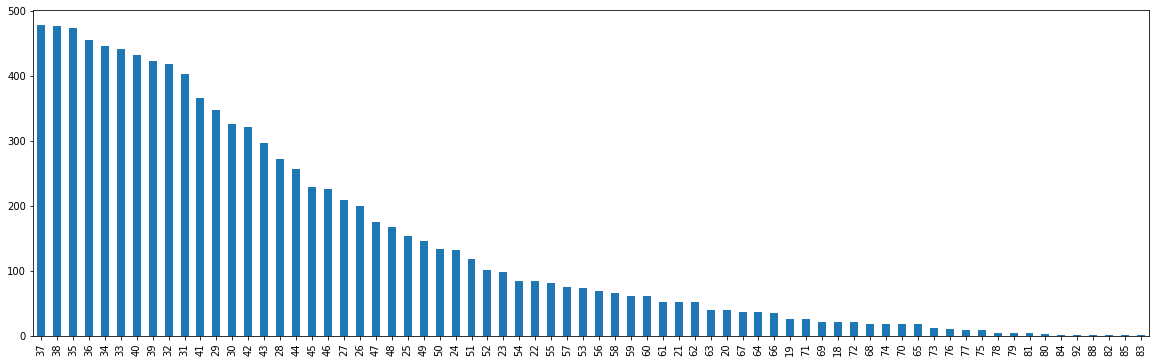

In [0]:
#Plotting the Age column on chart
bank["Age"].value_counts().plot.bar(figsize=(20,6))
print('As per the graph we can see age ranges from 37 to 52 years with maximum count')


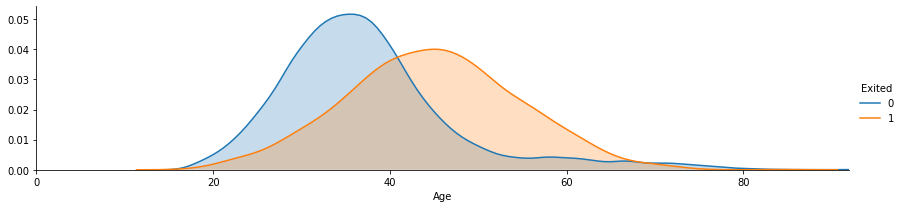

plotted graph. this graph is plotted for Exited and non exited customer as from this graph we can clearly see that 40 to 60 years age people has higher chances to churn


In [0]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, bank["Age"].max()))
facet.add_legend()

plt.show()
print('plotted graph. this graph is plotted for Exited and non exited customer as from this graph we can clearly see that 40 to 60 years age people has higher chances to churn')

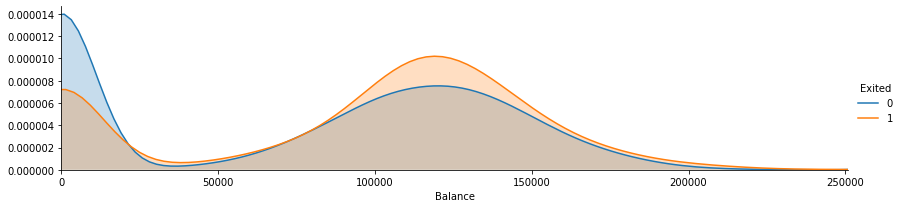

people with balance 100000 to 150000 has higher chances of churn


In [0]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, bank["Balance"].max()))
facet.add_legend()

plt.show()
print('people with balance 100000 to 150000 has higher chances of churn')

In [0]:
bank_feature = bank.drop('Exited',axis=1)
bank_target = bank['Exited']

In [0]:
bank_feature.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [0]:
bank_target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [0]:
#splitting the dataset in train and test 
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(bank_feature,bank_target,test_size=.30,random_state=2)

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
import numpy as np


In [0]:
train_x =np.array(train_x).astype('float32')
test_x = np.array(test_x).astype('float32')
train_y =np.array(train_y).astype('float32')
test_y = np.array(test_y).astype('float32')

In [0]:
#Normalize the data
features_train_x = tf.math.l2_normalize(train_x)
feature_test_x = tf.math.l2_normalize(test_x)

In [0]:
train_y.shape

(7000,)

In [0]:
features_train_x.shape

TensorShape([7000, 13])

In [0]:
train_y=train_y.reshape(-1,1)

In [0]:
train_y.shape

(7000, 1)

In [0]:
train_x.shape

(7000, 13)

In [0]:
W = tf.zeros(shape=(13, 1))
b = tf.zeros(shape=(1))

In [0]:
W.shape

TensorShape([13, 1])

In [0]:
b.shape

TensorShape([1])

In [0]:
import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [0]:
#building ANN classifier

classifier = Sequential()

#adding first layer(input layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', input_dim=13, 
                     activation='relu'))

#adding second layer(hidden layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding third layer(output layer)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the ANN
classifier.fit(train_x, train_y, batch_size=10, epochs=100)


Train on 7000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 190us/sample - loss: 0.5692 - accuracy: 0.7867
Epoch 2/100
7000/7000 [==============================] - 1s 152us/sample - loss: 0.5255 - accuracy: 0.7926
Epoch 3/100
7000/7000 [==============================] - 1s 153us/sample - loss: 0.5198 - accuracy: 0.7926
Epoch 4/100
7000/7000 [==============================] - 1s 156us/sample - loss: 0.5142 - accuracy: 0.7926
Epoch 5/100
7000/7000 [==============================] - 1s 154us/sample - loss: 0.5145 - accuracy: 0.7926
Epoch 6/100
7000/7000 [==============================] - 1s 155us/sample - loss: 0.5094 - accuracy: 0.7926
Epoch 7/100
7000/7000 [==============================] - 1s 156us/sample - loss: 0.5093 - accuracy: 0.7926
Epoch 8/100
7000/7000 [==============================] - 1s 156us/sample - loss: 0.5088 - accuracy: 0.7926
Epoch 9/100
7000/7000 [==============================] - 1s 155us/sample - loss: 0.5058 - accuracy: 0.7926
Epoch 10/100
70

In [0]:
from sklearn.metrics import accuracy_score

pred1 = classifier.predict(test_x)
pred1

array([[0.20783657],
       [0.20783657],
       [0.20783657],
       ...,
       [0.20783657],
       [0.20783657],
       [0.20783657]], dtype=float32)

In [0]:
prediction_y = np.where(pred1>0.5,1,0)
prediction_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
#Printing the accuracy score
accuracy_score(test_y, prediction_y)

0.805

In [0]:
from sklearn import metrics

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pred1.round())

In [0]:
#printing the confusion matrix
cm

array([[2415,    0],
       [ 585,    0]])

In [0]:
#Optimization is not covered in the residency so leaving it as it is.